In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
#Cargo los datos en memoria

postulantes_educacion = pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero_y_edad = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

# Parte 1: Análisis de los datos: Estructura, formato, tipos de datos.


## Primer dataframe: postulantes_educacion

In [3]:
#Vistazo a la estructura del dataframe

postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [4]:
#Posee 298231 registros

postulantes_educacion.shape

(298231, 3)

In [5]:
#Renombro las columnas a un nombre más apropiado

postulantes_educacion = postulantes_educacion.rename(columns={"nombre":"gradoactual"})
postulantes_educacion.head()

,idpostulante,gradoactual,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [6]:
#Hay algun dato nulo?

postulantes_educacion.isnull().any()

idpostulante    False
gradoactual     False
estado          False
dtype: bool

In [7]:
#Existen 188752 postulantes diferentes

postulantes_educacion['idpostulante'].value_counts().count()

188752

In [8]:
#La variable gradoactual es categórica, veamos cuáles son sus posibles valores. 

postulantes_educacion['gradoactual'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: gradoactual, dtype: int64

In [9]:
#Estado también es categórica, veamos sus posibles estados

postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

## Segundo dataframe: postulantes_genero_y_edad

In [10]:
#Vistazo a la estructura del dataframe

postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [11]:
#200888 registros

postulantes_genero_y_edad.shape

(200888, 3)

In [12]:
#Hay postulantes sin fecha de nacimiento cargada, luego veremos cuáles son

postulantes_genero_y_edad.isnull().any()

idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

In [13]:
#No hay postulantes repetidos en el dataframe, pero son más de los que aparecen en el postulantes_educacion. Luego hay
#postulantes que no poseen ninguna educación.

postulantes_genero_y_edad['idpostulante'].value_counts().size

200888

In [14]:
#Comprobamos los posibles valores de sexo

postulantes_genero_y_edad['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [15]:
#Vimos que hay postulantes sin fecha de nacimiento cargada, veamos cuántos son
#Tenemos 4750 postulantes sin fecha de nacimiento declarada

len(postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()])

4750

In [16]:
#Observando el formato de las fechas no nulas, vemos que existen 7 que no respetan el formato AA/MM/DD
#Dado que representan un porcentaje ínfimo del total de registros, elegimos ignorarlos para así evitar tener que 
#asumir qué fecha representan.

postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()==False].sort_values('fechanacimiento',ascending=True).head(10)

,idpostulante,fechanacimiento,sexo
148638,GNZOvAv,0004-07-19,MASC
149653,1QPQ8QL,0011-03-08,MASC
145683,dYjV0rb,0012-11-04,NO_DECLARA
130846,8M2R6pz,0024-02-09,FEM
71458,LN85Y3b,0029-05-11,MASC
56206,xkPwXwY,0031-12-11,FEM
141832,A36Npjj,0033-09-14,FEM
154559,xkdvwm0,1775-07-09,MASC
164618,96X1loa,1917-07-08,MASC
156483,4rP8l0R,1921-08-18,FEM


In [3]:
#Convierto la columna fechanacimiento a formato datetime. 

postulantes_genero_y_edad['fechanacimiento'] = pd.to_datetime(postulantes_genero_y_edad['fechanacimiento'], errors='coerce')

In [18]:
#Si revisamos ahora a los postulantes sin fecha de nacimiento, observamos que ahora hay 7 más que antes. Estos 7 deberían ser
#los que tenían el formato incorrecto.

len(postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()])

4757

In [19]:
#Tal como lo anticipamos, ahora tienen fecha de nacimiento nula.

postulantes_genero_y_edad.iloc[[148638,149653,145683,130846,71458,56206,141832],:]

,idpostulante,fechanacimiento,sexo
148638,GNZOvAv,NaT,MASC
149653,1QPQ8QL,NaT,MASC
145683,dYjV0rb,NaT,NO_DECLARA
130846,8M2R6pz,NaT,FEM
71458,LN85Y3b,NaT,MASC
56206,xkPwXwY,NaT,FEM
141832,A36Npjj,NaT,FEM


In [4]:
#Vamos ahora a agregar una columna adicional al dataframe, de modo que podamos observar la edad de cada persona

postulantes_genero_y_edad['edad'] = ((pd.datetime.today() - postulantes_genero_y_edad['fechanacimiento']).dt.days/365)
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].fillna(0)
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].astype(int)
postulantes_genero_y_edad.head(10)

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,47
1,5awk,1962-12-04,FEM,55
2,ZaO5,1978-08-10,FEM,39
3,NdJl,1969-05-09,MASC,48
4,eo2p,1981-02-16,MASC,37
5,Ez8J,1968-12-18,MASC,49
6,aOQq,1966-07-16,MASC,51
7,8BkL,1976-07-21,FEM,41
8,1d2B,1976-02-28,MASC,42
9,NPBx,1981-03-09,MASC,37


In [21]:
#Reviso la edad de las personas que cumplen años el 29/02

postulantes_nacidos_en_febrero = postulantes_genero_y_edad.loc[postulantes_genero_y_edad['fechanacimiento'].dt.month == 2]
postulantes_nacidos_en_febrero.loc[postulantes_nacidos_en_febrero['fechanacimiento'].dt.day == 29].sort_values('fechanacimiento',ascending = False).head(10)

,idpostulante,fechanacimiento,sexo,edad
197120,6rP38R3,2000-02-29,FEM,18
194211,3NP3dAJ,2000-02-29,FEM,18
186798,Bm5dkzR,2000-02-29,MASC,18
99625,xka3KJz,1996-02-29,MASC,22
73390,KBzQ4EX,1996-02-29,FEM,22
129557,rm05XGO,1996-02-29,FEM,22
129283,pzMVjZL,1996-02-29,FEM,22
128947,BmB6zNR,1996-02-29,MASC,22
118090,5mdVq4X,1996-02-29,FEM,22
111994,4rdGeJA,1996-02-29,FEM,22


# Tercer dataframe: vistas

In [5]:
#Vistazo a la estructura del dataframe

vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [6]:
#El dataframe posee 961897 registros

vistas.shape

(961897, 3)

In [7]:
#No tenemos registros nulos

vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

In [8]:
#En este dataframe tenemos 7459 avisos únicos 

vistas['idAviso'].value_counts().size

7458

In [9]:
#Y de los 200888 postulantes del dataset, solamente 87443 han visto al menos un aviso

vistas['idpostulante'].value_counts().size

87443

In [10]:
#Ordeno la informacion sobre la fecha y hora de visualizaciones, modificando su formato y agregando columnas que me permitan
#analizar de forma individual la fecha y la hora.

vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])
vistas['fechavisualizacion'] = vistas['timestamp'].dt.date
vistas['horavisualizacion'] = vistas['timestamp'].dt.time
vistas.sort_values('fechavisualizacion').head(10)

,idAviso,timestamp,idpostulante,fechavisualizacion,horavisualizacion
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18:38:13.187000
31485,1112341841,2018-02-23 21:51:51.982,ekormbo,2018-02-23,21:51:51.982000
31486,1112200601,2018-02-23 21:51:52.505,OqmKPMx,2018-02-23,21:51:52.505000
31487,1112359762,2018-02-23 21:51:53.945,dY5xDpa,2018-02-23,21:51:53.945000
31488,1112359762,2018-02-23 21:51:55.853,dY5xDpa,2018-02-23,21:51:55.853000
31489,1112325077,2018-02-23 21:51:56.130,LNMLjrb,2018-02-23,21:51:56.130000
31490,1112206678,2018-02-23 21:51:58.159,W9WedvX,2018-02-23,21:51:58.159000
31491,1112358985,2018-02-23 21:51:58.338,VNljdJj,2018-02-23,21:51:58.338000
31492,1112356859,2018-02-23 21:52:01.285,bOJwJp4,2018-02-23,21:52:01.285000
31493,1112359793,2018-02-23 21:52:01.696,8MaQjP3,2018-02-23,21:52:01.696000


# Cuarto dataframe: postulaciones

In [28]:
#Vistazo a la estructura del dataframe

postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [29]:
#Tenemos 3401623 registros

postulaciones.shape

(3401623, 3)

In [30]:
#No hay registros nulos

postulaciones.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [31]:
#Tenemos 12692 avisos con al menos una postulacion

postulaciones['idaviso'].value_counts().size

12692

In [32]:
#Todos los postulantes del dataset se han postulado al menos a un aviso

postulaciones['idpostulante'].value_counts().size

200888

In [11]:
##Ordeno la informacion sobre la fecha y hora de postulación, modificando su formato y agregando columnas que me permitan
#analizar de forma individual la fecha y la hora.

postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones = postulaciones.rename(columns={'fechapostulacion':'fechahorapostulacion'})
postulaciones['fechapostulacion'] = postulaciones['fechahorapostulacion'].dt.date
postulaciones['horapostulacion'] = postulaciones['fechahorapostulacion'].dt.time

postulaciones.sort_values('fechapostulacion').head(10)

,idaviso,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15,16:22:34
736839,1112261550,qekqr4b,2018-01-15 19:00:07,2018-01-15,19:00:07
2524985,1112145604,N5Doal,2018-01-15 11:48:56,2018-01-15,11:48:56
2524984,1112239063,N5Doal,2018-01-15 11:44:57,2018-01-15,11:44:57
736893,1112257631,PmV48YJ,2018-01-15 10:12:34,2018-01-15,10:12:34
736894,1112261524,PmV48YJ,2018-01-15 16:26:58,2018-01-15,16:26:58
736941,1112245598,KBAvVxX,2018-01-15 22:41:33,2018-01-15,22:41:33
736942,1112247307,KBAvVxX,2018-01-15 22:42:12,2018-01-15,22:42:12
736943,1111936969,KBAvVxX,2018-01-15 22:42:56,2018-01-15,22:42:56
736944,1112251166,KBAvVxX,2018-01-15 22:43:08,2018-01-15,22:43:08


# Quinto dataframe: avisos_online

In [34]:
#Vistazo a la estructura del dataframe

avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [35]:
#Existen 5028 avisos online

avisos_online.shape

(5028, 1)

In [36]:
#No hay registros nulos

avisos_online.isnull().any()

idaviso    False
dtype: bool

In [37]:
#Tampoco hay ids repetidos

avisos_online['idaviso'].value_counts().size

5028

# Sexto dataframe: avisos_detalle

In [38]:
#Vistazo a la estructura del dataframe

avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [39]:
#Existen 13534 avisos contra los 5028 que teniamos en avisos_online. Significa que los restantes 8506 están inactivos?

avisos_detalle.shape

(13534, 11)

In [40]:
#Tenemos nulos en los campos ciudad, mapa y denominacion_empresa

avisos_detalle.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

In [41]:
#13487 no tienen registrada la ciudad

avisos_detalle.loc[avisos_detalle['ciudad'].isnull()].shape

(13487, 11)

In [42]:
#Cinco avisos no tienen registrada la empresa que lleva a cabo la búsqueda

avisos_detalle.loc[avisos_detalle['denominacion_empresa'].isnull()].shape

(5, 11)

In [43]:
#Todos los avisos son del mismo país

avisos_detalle['idpais'].value_counts()

1    13534
Name: idpais, dtype: int64

In [44]:
#Zonas entre las que se reparten los avisos, podemos corroborar que todos los avisos 
#corresponden a Buenos Aires como dice la consigna

avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

# Parte 2: Exploración de los datos

## Postulaciones por mes


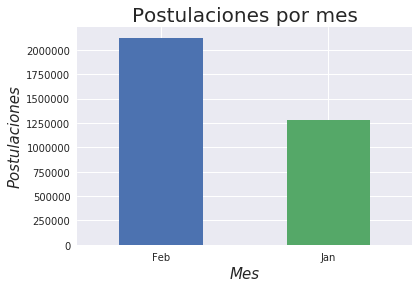

In [45]:
name_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',
       8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

postulaciones['Month'] = postulaciones['fechahorapostulacion'].dt.month.apply(lambda x: name_month[x])

postulaciones_por_mes=postulaciones['Month'].value_counts()
postulaciones_por_mes.plot(kind='bar', rot=0)
plt.title("Postulaciones por mes", size=20)
plt.xlabel("Mes",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()

## Postulaciones en el mes de enero


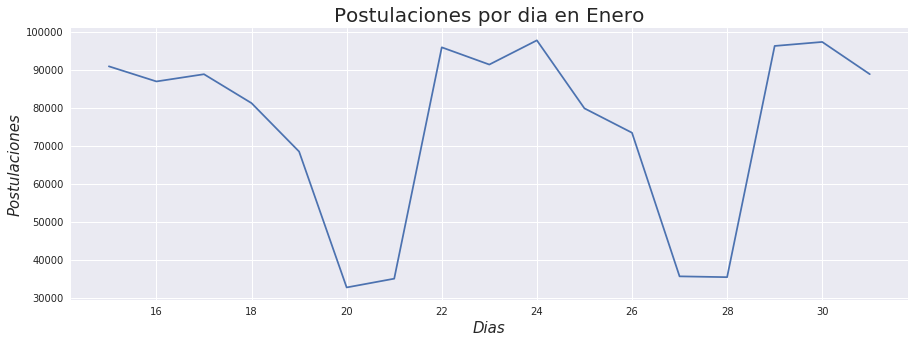

In [46]:
postulaciones['Number'] = postulaciones['fechahorapostulacion'].dt.day

df_enero = postulaciones[postulaciones['Month']=='Jan']
df_enero['Number'].value_counts().sort_index().plot(kind='line',figsize=(15,5))
plt.title("Postulaciones por dia en Enero", size=20)
plt.xlabel("Dias",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()


## Postulaciones en el mes de febrero

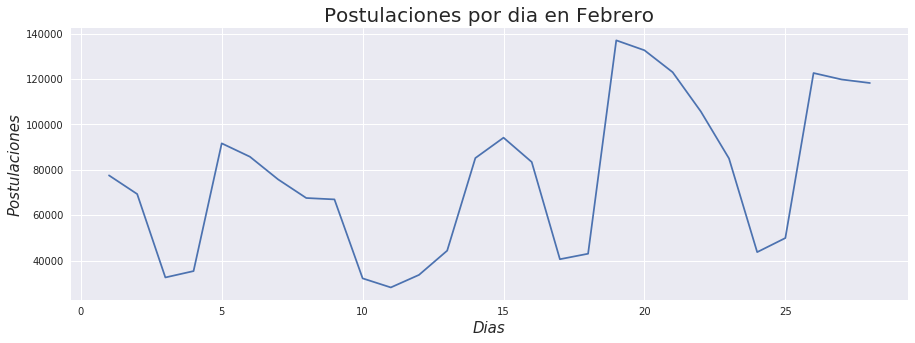

In [47]:
df_febrero = postulaciones[postulaciones['Month']=='Feb']
df_febrero['Number'].value_counts().sort_index().plot(kind='line',figsize=(15,5))
plt.title("Postulaciones por dia en Febrero", size=20)
plt.xlabel("Dias",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()

## Cantidad de avisos según nivel laboral 

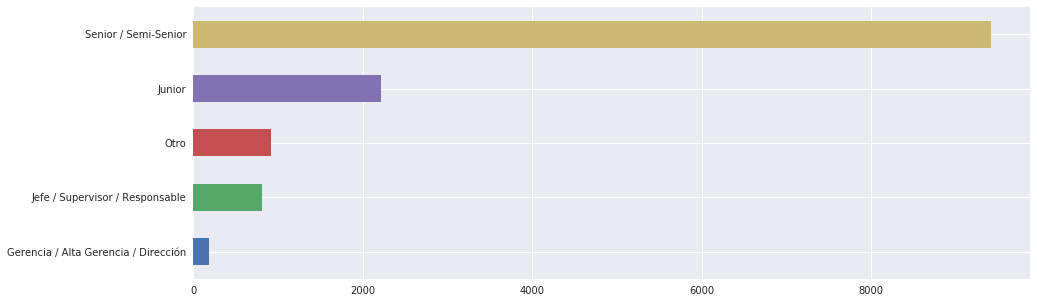

In [48]:
avisos_detalle['nivel_laboral'].value_counts().head().sort_values().plot(kind='barh', figsize=(15,5))
plt.show()

## Cantidad de avisos por empresa 

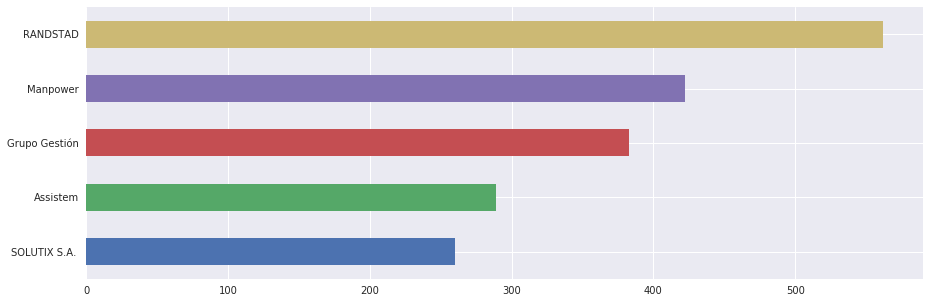

In [49]:
avisos_detalle['denominacion_empresa'].value_counts().head().sort_values().plot(kind='barh', figsize=(15,5))
plt.show()

## Cantidad de avisos por zona 

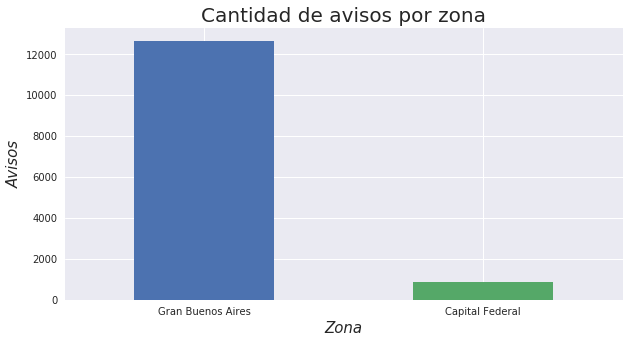

In [50]:
avisos_detalle['nombre_zona'].value_counts().head(2).plot(kind='bar',rot=0, figsize=(10,5))
plt.title("Cantidad de avisos por zona", size=20)
plt.xlabel("Zona",size=15,style='italic')
plt.ylabel("Avisos",size=15,style='italic')
plt.show()

## Cantidad de avisos por tipo de trabajo 

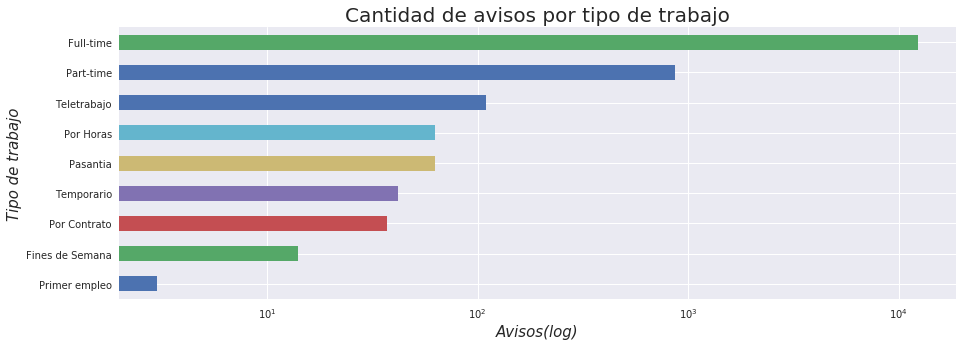

In [84]:
avisos_detalle['tipo_de_trabajo'].value_counts().sort_values().plot(logx=True,kind='barh',figsize=(15,5))
plt.title("Cantidad de avisos por tipo de trabajo", size=20)
plt.xlabel("Avisos(log)",size=15,style='italic')
plt.ylabel("Tipo de trabajo",size=15,style='italic')
plt.show()

## Cantidad de avisos por area 

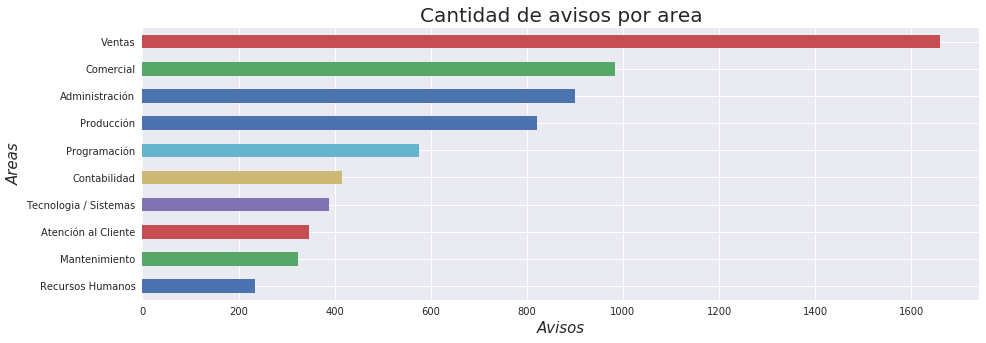

In [52]:
avisos_detalle['nombre_area'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Cantidad de avisos por area", size=20)
plt.ylabel("Areas",size=15,style='italic')
plt.xlabel("Avisos",size=15,style='italic')
plt.show()

## Cantidad de postulantes por educacion y estado

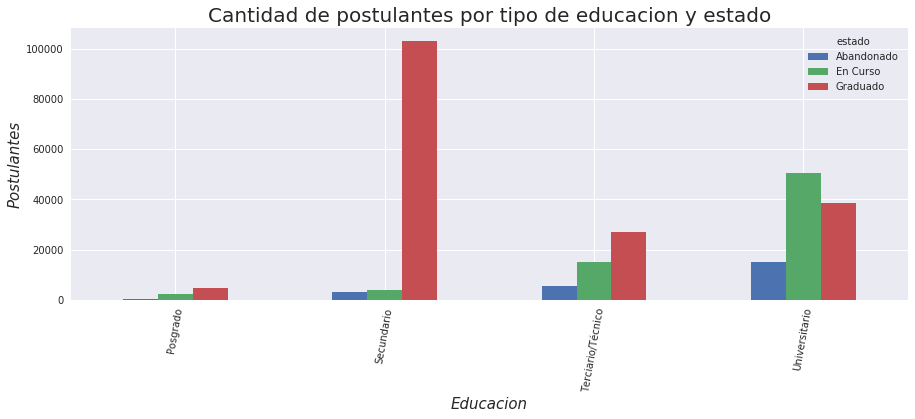

In [53]:
postulantes_educacion.groupby(['gradoactual','estado']).count().unstack()['idpostulante'].drop(['Master','Doctorado','Otro']).plot(kind='bar',rot=80, figsize=(15,5))
plt.title("Cantidad de postulantes por tipo de educacion y estado", size=20)
plt.xlabel("Educacion",size=15,style='italic')
plt.ylabel("Postulantes",size=15,style='italic')
plt.show()

## Edades con mayores postulantes  

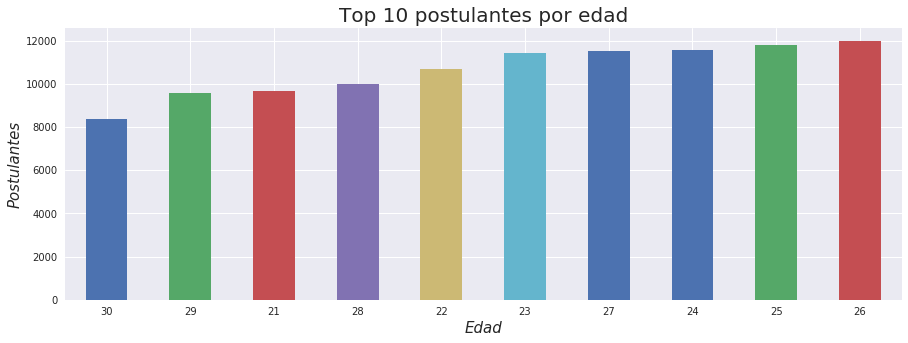

In [54]:
postulantes_genero_y_edad['edad'].value_counts().head(10).sort_values().plot(kind='bar', rot=0, figsize=(15,5))
plt.title("Top 10 postulantes por edad", size=20)
plt.xlabel("Edad", size=15,style='italic')
plt.ylabel("Postulantes",size=15,style='italic')
plt.show()

## Postulantes por genero

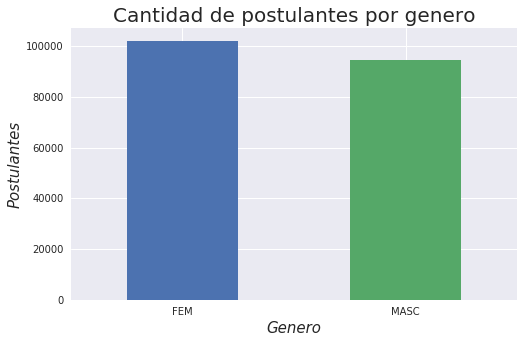

In [55]:
postulantes_genero_y_edad['sexo'].value_counts().drop('NO_DECLARA').plot(kind='bar',rot=0,figsize=(8,5))
plt.title("Cantidad de postulantes por genero",size=20)
plt.xlabel("Genero",size=15,style='italic')
plt.ylabel("Postulantes",size=15,style='italic')
plt.show()

## Revisar 

In [56]:
#De 1990 a 1995 son los años de nacimiento con los mayores postulantes

#df_mas_post = postulantes_genero_y_edad[(postulantes_genero_y_edad['fechanacimiento'] >= datetime(1990,1,1)) & ((postulantes_genero_y_edad['fechanacimiento']) < datetime(1996,1,1))]
#df_mas_post['anio'] = df_mas_post.loc[:,'fechanacimiento'].dt.year
#df_mas_post.groupby(['anio','sexo']).count().unstack()['idpostulante'].drop('NO_DECLARA',axis=1).plot(kind='bar',rot=0,figsize=(15,5))
#plt.title("Diferencia entre generos en los años de nacimiento con mas postulantes", size=20)
#plt.xlabel("Año",size=15,style='italic')
#plt.ylabel("Postulantes",size=15,style='italic')
#plt.show()

## Areas mas vistas en general

In [57]:
df_avisos_detalle_min = avisos_detalle.drop(['titulo','idpais','descripcion','ciudad','mapacalle','denominacion_empresa'],axis=1)
df_avisos_detalle_min.head()

,idaviso,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area
0,8725750,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial
1,17903700,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud
2,1000150677,Capital Federal,Full-time,Senior / Semi-Senior,Transporte
3,1000610287,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte
4,1000872556,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Producción


In [58]:
df_merge = postulantes_genero_y_edad.merge(vistas,how='inner',on='idpostulante').drop('timestamp', axis=1).rename(str.lower, axis=1)
df_merge = df_merge.merge(df_avisos_detalle_min,how='inner',on='idaviso')
df_merge = df_merge.merge(postulantes_educacion,how='inner',on='idpostulante').rename({'nombre':'educacion'}, axis=1)
df_merge.head()

,idpostulante,fechanacimiento,sexo,edad,idaviso,fechavisualizacion,horavisualizacion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,gradoactual,estado
0,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,20:53:48.610000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado
1,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,20:53:48.610000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Terciario/Técnico,Graduado
2,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:05.411000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado
3,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:05.411000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Terciario/Técnico,Graduado
4,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:04.673000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado


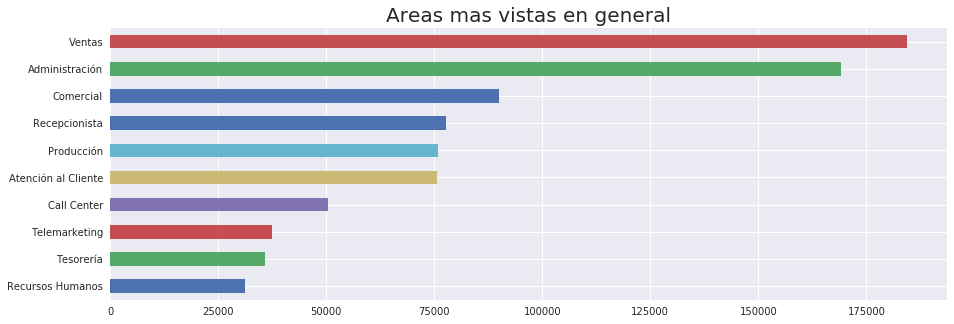

In [59]:
df_merge['nombre_area'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas en general", size=20)
plt.show()

## Areas mas vistas por el genero fememino 

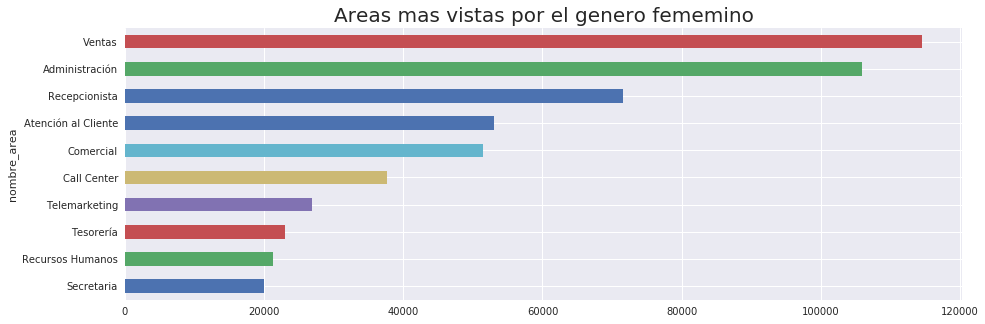

In [60]:
df_merge.groupby(['sexo','nombre_area']).count()['idpostulante']['FEM'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas por el genero fememino", size=20)
plt.show()

## Areas mas vistas por el genero masculino 

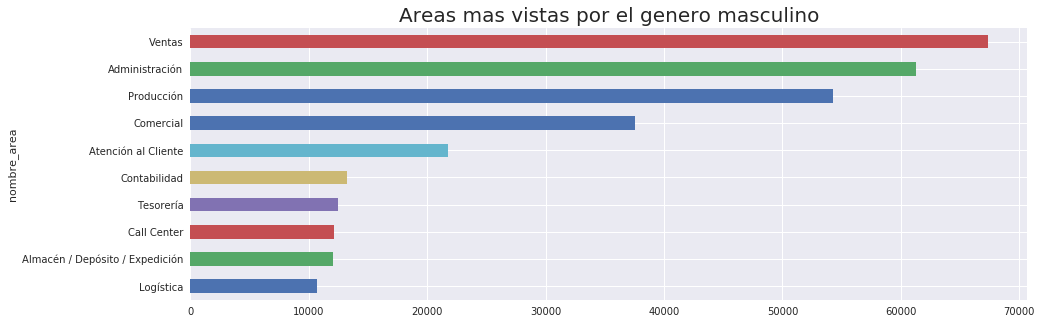

In [61]:
df_merge.groupby(['sexo','nombre_area']).count()['idpostulante']['MASC'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas por el genero masculino", size=20)
plt.show()

## Areas mas vistas, universitarios 

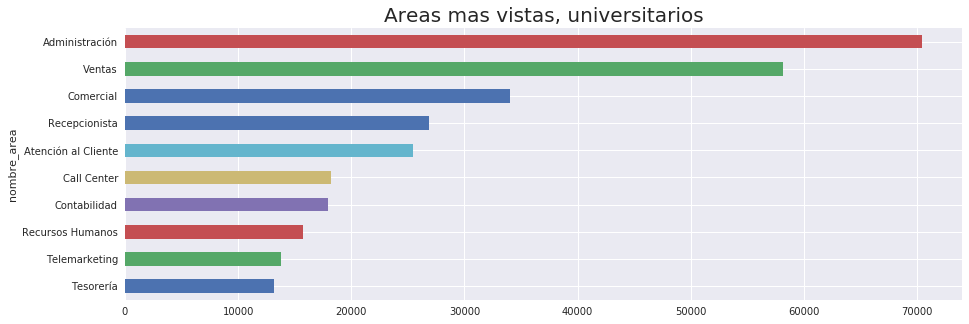

In [62]:
df_merge.groupby(['gradoactual','nombre_area']).count()['idpostulante']['Universitario'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas, universitarios", size=20)
plt.show()

## Areas mas vistas, secundario 

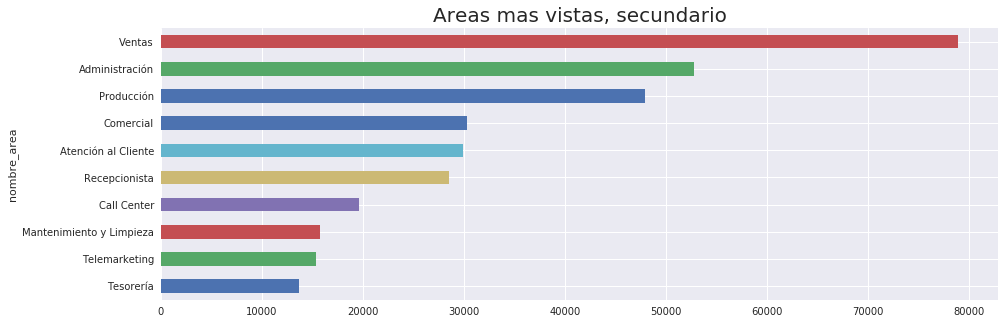

In [63]:
df_merge.groupby(['gradoactual','nombre_area']).count()['idpostulante']['Secundario'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas, secundario", size=20)
plt.show()

## Cantidad de postulantes por tipo de educacion 

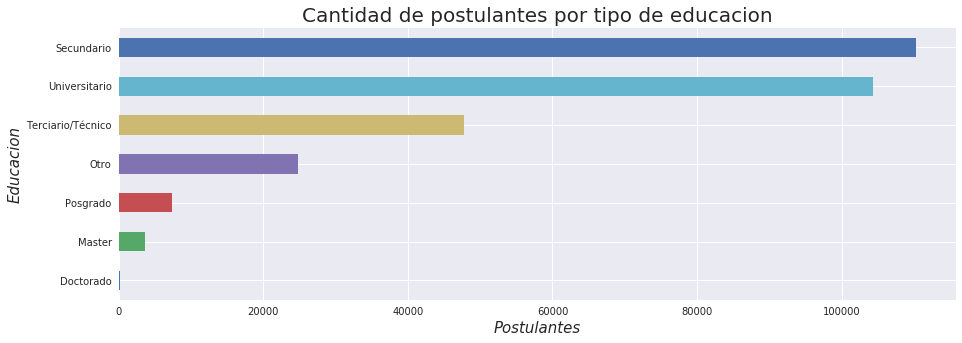

In [64]:
postulantes_educacion['gradoactual'].value_counts(ascending=True).plot(kind='barh', figsize=(15,5))
plt.title("Cantidad de postulantes por tipo de educacion",size=20)
plt.ylabel("Educacion",size=15,style='italic')
plt.xlabel("Postulantes",size=15,style='italic')
plt.show()

## ¿Se ven afectadas las postulaciones según el día de la semana en el que estamos?

In [66]:
#Vamos a responder a la pregunta, para ello pimero necesito identificar en qué día de la semana se realizó cada una
#de las postulaciones del set de datos

postulaciones['diapostulacion'] = postulaciones['fechahorapostulacion'].dt.weekday_name
postulaciones.head()

,idaviso,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion,Month,Number,diapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15,16:22:34,Jan,15,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06,09:04:50,Feb,6,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22,09:04:47,Feb,22,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22,09:04:59,Feb,22,Thursday
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25,18:55:03,Jan,25,Thursday


In [67]:
#Veamos cómo se distribuyen las postulaciones según en qué día de la semana estamos

postulaciones_segun_dia = postulaciones['diapostulacion'].value_counts()
postulaciones_segun_dia

Wednesday    677836
Monday       668310
Tuesday      658428
Thursday     506163
Friday       446698
Sunday       226857
Saturday     217331
Name: diapostulacion, dtype: int64

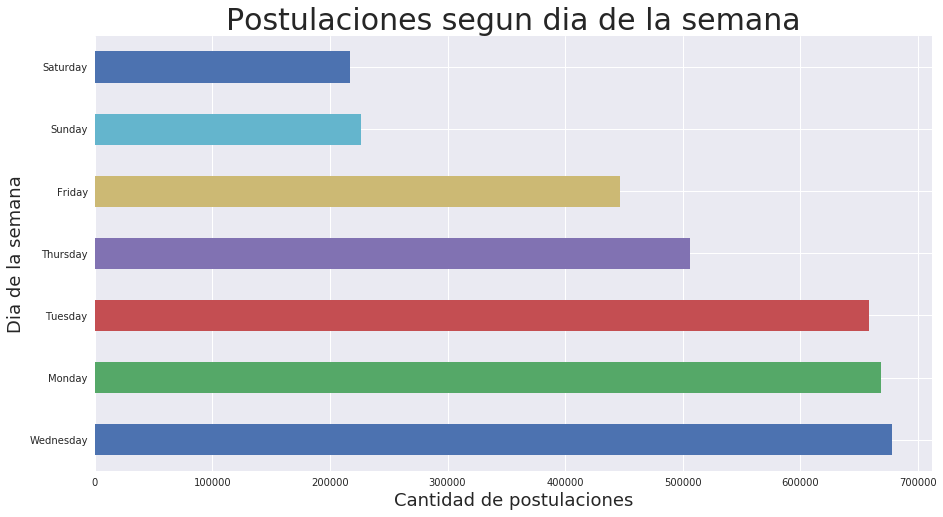

In [124]:
#Ahora lo volcamos a un gráfico para comunicar el resultado.
#La respuesta a la pegunta que formulamos claramente es sí.
#Podemos ver cómo decae la actividad durante la segunda mitad de la semana y cómo se concentra en sus 
#primeros tres días hábiles.

plot = postulaciones_segun_dia.plot(kind="barh", figsize=(15,8),grid=True)
plot.set_title('Postulaciones segun dia de la semana',fontsize=30)
plot.set_xlabel("Cantidad de postulaciones",fontsize=18)
plot.set_ylabel("Dia de la semana", fontsize=18)
plt.show()

## Actividad durante el dia más concurrido de la semana

In [69]:
#Obtengo todas las postulaciones de los miércoles

postulaciones_miercoles = postulaciones.loc[postulaciones['diapostulacion'] == 'Wednesday']

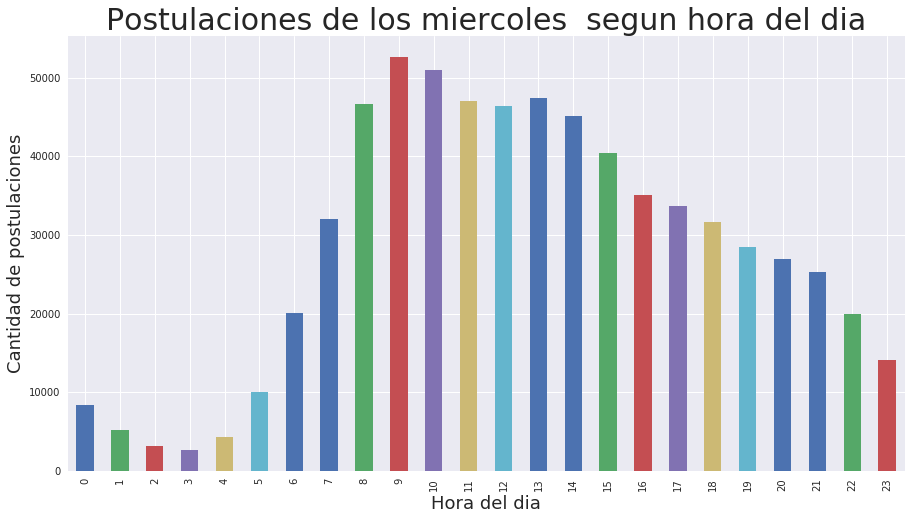

In [125]:
#Vemos que el pico de postulaciones se produce durante el transcurso de las 9 AM y a partir de allí sigue una tendencia
#descendente salvo una ligera remontada a las 13 hs (Break para almorzar?)

plot = postulaciones_miercoles['fechahorapostulacion'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(15,8), grid=True)
plot.set_title('Postulaciones de los miercoles  segun hora del dia',fontsize=30)
plot.set_xlabel("Hora del dia",fontsize=18)
plot.set_ylabel("Cantidad de postulaciones", fontsize=18)
plt.show()

# Top 10 áreas de trabajo con más postulaciones

In [71]:
#Para averiguarlo, vamos a tener que juntar el df de postulaciones con el de avisos_detalle

postulaciones_x_avisos_detalle = pd.merge(avisos_detalle, postulaciones, on='idaviso', how='inner')
postulaciones_x_avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion,Month,Number,diapostulacion
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,4rWEjrA,2018-01-16 21:58:40,2018-01-16,21:58:40,Jan,16,Tuesday
1,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,qewD0aR,2018-02-06 15:51:54,2018-02-06,15:51:54,Feb,6,Tuesday
2,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,3N2dBdq,2018-02-08 10:49:43,2018-02-08,10:49:43,Feb,8,Thursday
3,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,0zkx2dY,2018-02-07 06:32:25,2018-02-07,06:32:25,Feb,7,Wednesday
4,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,ZDrdPVR,2018-01-15 09:23:40,2018-01-15,09:23:40,Jan,15,Monday


In [72]:
#Obtengo las diez areas con mas postulaciones

top_10_areas_con_mas_postulaciones = postulaciones_x_avisos_detalle.groupby('nombre_area').agg({'idaviso':'count'}).sort_values('idaviso',ascending=False).head(10)

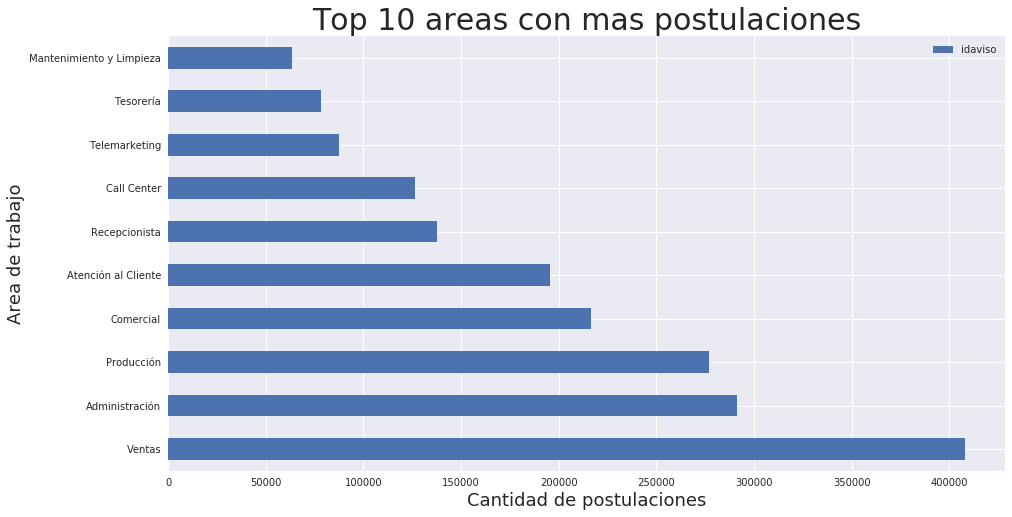

In [73]:
#Podemos observar que más del 50% de las postulaciones se reparten entre las áreas de call center, 
#recepcionista, atención al cliente, comercial, producción, administración y ventas.
plot = top_10_areas_con_mas_postulaciones.plot(kind='barh',grid=True,figsize=(15,8))
plot.set_title('Top 10 areas con mas postulaciones',fontsize=30)
plot.set_xlabel("Cantidad de postulaciones",fontsize=18)
plot.set_ylabel("Area de trabajo", fontsize=18)
plt.show()

# Distribucion de edades de postulantes dentro de las 10 áreas más populares


In [74]:
#Voy a seguir usando el mismo df que obtuve del merge anterior, ahora lo junto con postulantes_genero_y_edad para obtener las 
#edades de quienes postulan

postulaciones_x_avisos_detalle_x_postulantes = pd.merge(postulaciones_x_avisos_detalle, postulantes_genero_y_edad, on='idpostulante', how='inner')

In [75]:
#Del dataframe que acabo de formar me quedo solamente con los registros que pertenecen a las diez areas observadas

top_10_areas_con_mas_postulaciones = top_10_areas_con_mas_postulaciones.reset_index()
avisos_de_areas_con_mas_postulantes = pd.merge(postulaciones_x_avisos_detalle_x_postulantes, top_10_areas_con_mas_postulaciones, on='nombre_area', how='inner')

In [76]:
avisos_de_areas_con_mas_postulantes.head()

,idaviso_x,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,...,fechahorapostulacion,fechapostulacion,horapostulacion,Month,Number,diapostulacion,fechanacimiento,sexo,edad,idaviso_y
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,...,2018-01-16 21:58:40,2018-01-16,21:58:40,Jan,16,Tuesday,1984-06-08,MASC,33,216677
1,1112160508,1,Ejecutivo/a de Ventas para atender clientes re...,"<p> </p><p style=""""><strong><span style="""">Ade...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,...,2018-01-15 22:46:36,2018-01-15,22:46:36,Jan,15,Monday,1984-06-08,MASC,33,216677
2,1112293493,1,Asesor Comercial SSR - Teletrabajo. Rosario,<p><em><strong>Para prestigiosa firma dedicada...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Senior / Semi-Senior,Comercial,...,2018-02-20 12:11:26,2018-02-20,12:11:26,Feb,20,Tuesday,1984-06-08,MASC,33,216677
3,1112241972,1,Ejecutivo de cuentas para empresa de tecnologi...,<p>Entre sus tareas mas importantes se encuent...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,...,2018-02-15 22:38:24,2018-02-15,22:38:24,Feb,15,Thursday,1984-06-08,MASC,33,216677
4,1112336366,1,Ejecutivo de Ventas (Rosario),"<p><span lang=""ES"">LoJack se encuentra en búsq...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,...,2018-02-15 22:39:56,2018-02-15,22:39:56,Feb,15,Thursday,1984-06-08,MASC,33,216677


In [77]:
#Tabla pivot para poder graficar un heatmap

tabla_pivot_avisos=avisos_de_areas_con_mas_postulantes.pivot_table(index='edad', columns='nombre_area', values='idaviso_x', aggfunc='count')

In [78]:
#Cambio los nombres de las columnas para evitar problemas con las tildes

tabla_pivot_avisos=tabla_pivot_avisos.rename(columns={'Administración':'Administracion','Atención al Cliente':'Atencion al Cliente','Producción':'Produccion','Tesorería':'Tesoreria'})

In [79]:
#Reviso edades ilogicas en el dataframe
avisos_de_areas_con_mas_postulantes['edad'].value_counts().sort_index().index

Int64Index([  0,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
             29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
             42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
             55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
             68,  69,  70,  75,  76,  96, 100, 242],
           dtype='int64')

In [80]:
#Limpio al pivot de las edades ilogicas encontradas
edades_ilogicas = [0,96,100,242]
tabla_pivot_avisos.drop(edades_ilogicas,inplace=True)

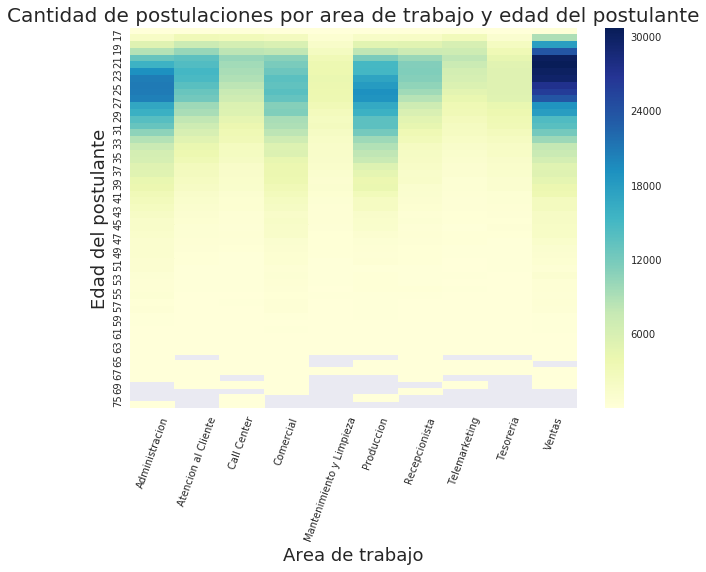

In [119]:
#Distribucion de postulantes por area segun edad de los mismos

g = sns.heatmap(tabla_pivot_avisos,  cmap="YlGnBu")
g.set_title("Cantidad de postulaciones por area de trabajo y edad del postulante", fontsize=20)
g.set_xlabel("Area de trabajo",fontsize=18)
g.set_ylabel("Edad del postulante", fontsize=18)
g.set_xticklabels(g.get_xticklabels(),rotation=70)
sns.set(rc={'figure.figsize':(10,7)})
plt.show()

## Horarios de postulaciones

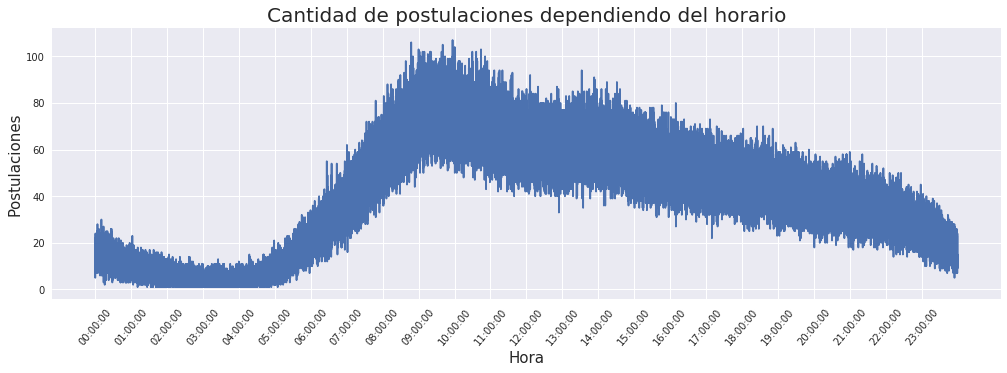

In [85]:
horas = [datetime.time(i,0,0,0) for i in range(24)]
postulaciones['horapostulacion'].value_counts().plot(kind='line',figsize=(17,5),rot=50)
plt.title("Cantidad de postulaciones dependiendo del horario", size=20)
plt.xticks(horas)
plt.xlabel("Hora", size=15)
plt.ylabel("Postulaciones", size=15)
plt.show()

## Horarios de vistas

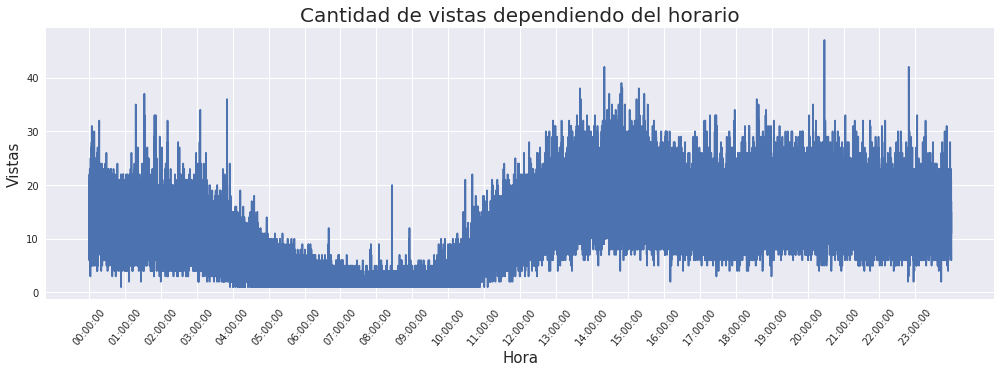

In [86]:
vistas['horavisualizacion'].apply(lambda x: x.replace(microsecond=0)).value_counts().plot(kind='line', figsize=(17,5),rot=50)
plt.title("Cantidad de vistas dependiendo del horario", size=20)
plt.xticks(horas)
plt.xlabel("Hora", size=15)
plt.ylabel("Vistas", size=15)
plt.show()